# Emoji Prediction
An introduction to machine learning in python

### Project Description

SemEval (Semantic Evaluation) is an ongoing series of evaluations of computational semantic analysis systems. The evaluations are intended to explore the nature of meaning in language. While meaning is intuitive to humans, transferring those intuitions to computational analysis has proved elusive and hence a benchmarking problem set for different languge models.

The dataset used here is from SemEval 2018 workshop which was part of Annual Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies (NAACL-HLT 2018).[More info here] https://competitions.codalab.org/competitions/17344



### Emoji Prediction is Natural Language Processing (NLP)
__Wiki def__ - Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. 
![title](imgs/reading_robot.png)

### Emoji Prediction is Text Classification
__Wiki def__ - In machine learning and statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.
![title](imgs/classification.png)

### Emoji Prediction is Sentiment Analysis
__Wiki def__ - Sentiment analysis (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. 
![title](imgs/sentiment-analysis.jpg)

### Emoji Prediction!
Tweets = Documents
<br> Emojis = Sentiment/Categories </br>

![title](imgs/twitter.png)

### Steps

1. Pre-processing
    - Stop word removal
    - Tokenisation
    - Generate text embeddings
2. Model training
    - Test train split
    - Train Multi-layer Perceptron classifier
3. Fine tune model
    -  Ensemble classifier
    -  Grid search and fine tuning
4. Error analysis 
    - Confusion matrix
    


### Supervised Learning!
 
![title](imgs/supervised_learning.png)

### KERNAL SETUP

### Install the required python packages

In [1]:
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install seaborn

### Load the packages to the kernal

In [2]:
# standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# scikit classifiers
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# sklearn model prep and finetune
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# visualisation
import seaborn as sn

%matplotlib inline

### DATA PREPROCESSING

In [3]:
tweets = open("datasets/1k_tweets.txt", encoding="utf8").read().split('\n')
emojis = open("datasets/1k_labels.txt", encoding="utf8").read().split('\n')

In [4]:
print(tweets[0:5])
print(emojis[0:5])

['LoL @ West Covina, California ', 'Things got a little festive at the office #christmas2016 @ RedRock… ', 'Step out and explore. # ️ @ Ellis Island Cafe ', '@user @ Cathedral Preparatory School ', "My baby bear @ Bubby's "]
['2', '17', '0', '18', '1']


In [5]:
print(open("datasets/us_mapping.txt", encoding="utf8").read())

0	❤	_red_heart_	
1	😍	_smiling_face_with_hearteyes_	
2	😂	_face_with_tears_of_joy_	
3	💕	_two_hearts_	
4	🔥	_fire_	
5	😊	_smiling_face_with_smiling_eyes_	
6	😎	_smiling_face_with_sunglasses_	
7	✨	_sparkles_	
8	💙	_blue_heart_	
9	😘	_face_blowing_a_kiss_	
10	📷	_camera_	
11	🇺🇸	_United_States_	
12	☀	_sun_	
13	💜	_purple_heart_	
14	😉	_winking_face_	
15	💯	_hundred_points_	
16	😁	_beaming_face_with_smiling_eyes_	
17	🎄	_Christmas_tree_	
18	📸	_camera_with_flash_	
19	😜	_winking_face_with_tongue_	



### [Term Document Matrix](https://en.wikipedia.org/wiki/Document-term_matrix)
![title](imgs/tdm.png)
### [Bag-Of-Words Model](https://en.wikipedia.org/wiki/Bag-of-words_model)
EX.
<br> "This is the first document"  ==> ["This", "is", "the", "first","document"] </br>
<br> "This document is the second document" == > ["This", "document", "is", "the", "second", "document"] </br>
### [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
Convert a collection of text documents to a matrix of token counts. (Term-Document-Matrix)

![title](imgs/countvector1.png)


### [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
Relevant words are not necessarily the most frequent words since stopwords like “the”, “of” or “a” tend to occur very often in many documents.

![title](imgs/tf-formula.png)
![title](imgs/tf-idf-usage.png)

In [6]:
# Learn the vocabulary dictionary and return term-document matrix
# Count Vectorizer - Convert a collection of text documents to a matrix of token counts
count_vect = CountVectorizer(ngram_range=(1,1), stop_words='english')
term_doc_matrix = count_vect.fit_transform(tweets)

# Normalize term document matrix
tfidf_transformer = TfidfTransformer()
normalized_tdm = tfidf_transformer.fit_transform(term_doc_matrix)


In [7]:
print ("----- FEATURES -----")
print(count_vect.get_feature_names())

----- FEATURES -----
['00p', '10', '101', '1015', '1103a', '12', '1251', '125th', '13', '14', '14612', '14th', '15', '16', '17', '18', '18236', '1st', '2012', '2014', '2015', '2016', '2017', '21', '21225', '21daystoplantbased', '21st', '22', '24', '245x3', '24inspired', '24th', '25', '2810', '285', '2k16', '2lbs', '2nd', '2x', '30', '30https', '31', '3100', '33', '34th', '360', '388', '39', '3rd', '420', '45p', '4s', '500', '5163uno', '529', '5fofo', '5rights', '60', '60th', '615', '675', '6th', '7000', '713', '75', '7th', '80', '807', '8lbs', '8pm', '95', '98', '___', '__lissuurr', '_ch3w', '_maddyfritz', '_th3r3almik3y_', 'a1', 'aaah', 'able', 'abraham', 'absolutely', 'abwyman', 'ac', 'academy', 'accomplished', 'achieve', 'achorusline', 'ackeeandsaltfish', 'actually', 'add', 'addicted', 'admiring', 'admission', 'adoring', 'adult', 'adventures', 'ae', 'aerial', 'af', 'afford', 'afsp', 'afternoon', 'afterparty', 'afterwork', 'agentprovacateur', 'aggie', 'ago', 'agree', 'ah', 'ahhh', 'a

In [8]:
print ("----- TDM -----")
print(term_doc_matrix.toarray())

----- TDM -----
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print ("----- NORMALIZED TDM -----")
print(normalized_tdm.toarray())

----- NORMALIZED TDM -----
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### MODEL TRAINING

In [10]:
X_train, X_test, y_train, y_test = \
    train_test_split(normalized_tdm, emojis, test_size = 0.3, random_state = 56)

In [11]:
#import collections
#collections.Counter(y_test)

In [12]:
classifier = MLPClassifier( max_iter=2000, random_state=123).fit(X_train, y_train)

# train accuracy
predictions = classifier.predict(X_train)
print(accuracy_score(predictions, y_train))

# test it out
predictions = classifier.predict(X_test)
print(accuracy_score(predictions, y_test))

0.9985714285714286
0.21333333333333335


### Prediction

In [13]:
emoji_name = open("datasets/us_mapping.txt", encoding="utf8").read().split('\n')
emoji_mapping = {}
for i in emoji_name[:-1]:
    emoji_mapping[i.split("\t")[0]] = i.split("\t")[1]

# test tweets
texts = [
        "It's not who I am underneath, but what I do that defines me.",
        "The chief enemy of creativity is good sense",
        "My car skidded on the wet street",
        "The day just keeps getting hot !",
        "Just keep swimming",
        "Bond. James Bond.",
        "We need guns. Lots of guns.",
        "1 dog = many retweets "
]

# predict reaction using the model
for text in texts: 
    term_doc_matrix = count_vect.transform([text])
    features = tfidf_transformer.transform(term_doc_matrix)
    prediction = classifier.predict(features)[0]
    print("{} {}".format(text, emoji_mapping[prediction], ))

It's not who I am underneath, but what I do that defines me. 😂
The chief enemy of creativity is good sense 😘
My car skidded on the wet street 😎
The day just keeps getting hot ! 😊
Just keep swimming 😂
Bond. James Bond. 💙
We need guns. Lots of guns. 😊
1 dog = many retweets  😂


### FINE TUNE THE MODEL

### Ensemble classifiers

In [14]:
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

In [15]:
# Classifiers 
svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()
mlp = MLPClassifier(max_iter=2000)

clifs = [svc, lsvc, rforest, dtree, mlp]

# train and test them 
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| SVC                       |         0.7900000 |     0.1766667 |
| LinearSVC                 |         0.9957143 |     0.2000000 |
| RandomForestClassifier    |         0.9985714 |     0.2000000 |
| DecisionTreeClassifier    |         0.9985714 |     0.1833333 |
| MLPClassifier             |         0.9985714 |     0.2033333 |


### Hyper tuning SVC

In [16]:
# search parameters
parameters = {'C':[1, 2, 3, 5, 10, 15, 20, 30, 50], 
             'tol':[0.1, 0.01, 0.001, 0.0001, 0.00001]}

lsvc = LinearSVC(random_state=123, max_iter=2000, dual = True)
grid_obj = GridSearchCV(lsvc, param_grid = parameters, cv=5)
grid_obj.fit(X_train, y_train)

print("Validation acc: {}".format(grid_obj.best_score_))
print("Training acc: {}".format(accuracy_score(y_train, grid_obj.predict(X_train))))
print("Test acc    : {}".format(accuracy_score(y_test, grid_obj.predict(X_test))))
print("Best parameter: {}".format(grid_obj.best_params_))

/Users/adarsa/tfES_env/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/adarsa/tfES_env/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Validation acc: 0.17714285714285713
Training acc: 0.9971428571428571
Test acc    : 0.19666666666666666
Best parameter: {'C': 2, 'tol': 0.1}


/Users/adarsa/tfES_env/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The final model for this project performs test accuracy 0.2. Although we tried to tune to minimize the overfitting, it seems to be not working well. The accuracy is low.

###  ERROR ANALYSIS

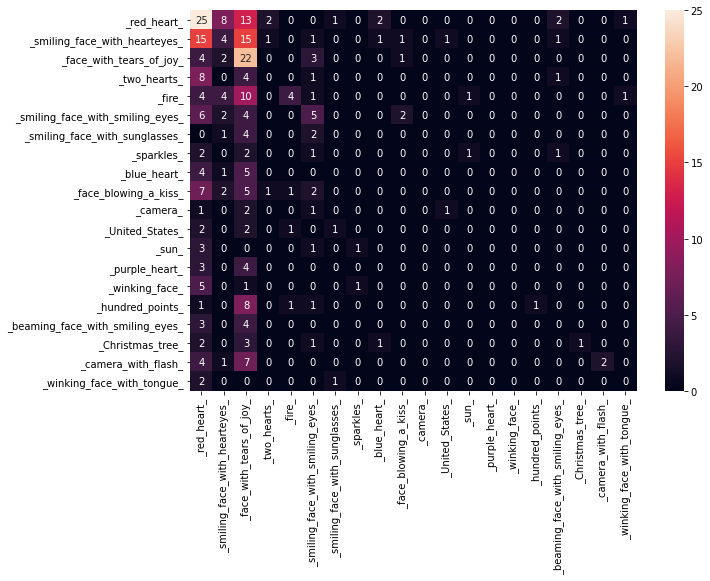

In [17]:
em_id = [(i.split("\t"))[0] for i in emoji_name[:-1]]
em_name = [(i.split("\t"))[2] for i in emoji_name[:-1]]

# predicted vs observed
matrix = confusion_matrix(y_test, classifier.predict(X_test), labels=em_id )

#seaborn heat map of confusion matrix
df_cm = pd.DataFrame(matrix, index = em_name, columns = em_name)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()